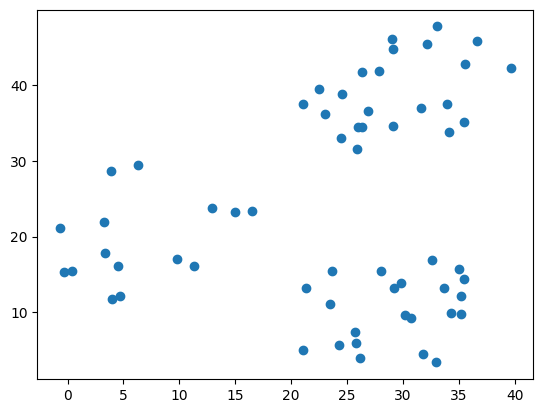

In [23]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors as colorlevels
import math

blobs = pd.read_csv('kmeans_blobs.csv')
plt.scatter(blobs['x'], blobs['y'])

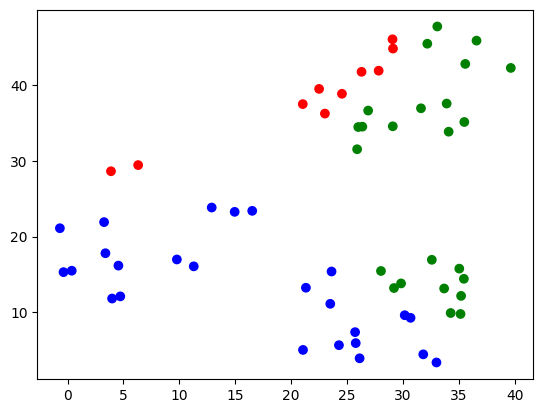

In [24]:
def get_distance(point1, point2):
    return np.sqrt( pow(point1['x'] - point2['x'], 2) + pow( point1['y'] - point2['y'], 2) )

def get_closest_centeroid(centeroids, point):
    min_distance = math.inf
    min_distance_centeroid_index = 0
    for i in range(centeroids.shape(0)):
        distance = get_distance(centeroids.iloc[i], point)
        if (min_distance > distance):
            min_distance = distance
            min_distance_centeroid_index = i
    return min_distance_centeroid_index

def get_center_of_gravity(points):
    (size, dim_size) = points.shape
    return {
        'x': sum(points['x'])/size,
        'y': sum(points['y'])/size
    }

# centeroids = [
#     { 'x': 7.5, 'y': 25 },
#     { 'x': 27.5, 'y': 10 },
#     { 'x': 32.5, 'y': 40 }
# ]
centeroids = {
    'x': [10, 35, 15],
    'y': [40, 25, 10]
}
centeroids = pd.DataFrame.from_dict(centeroids)

for i in range(1, len(blobs)):
    blobs.loc[i, 'centeroid'] = get_closest_centeroid(centeroids, blobs.iloc[i])


cmap, norm = colorlevels([0, 1, 2, 3], ['red', 'green', 'blue'])
plt.scatter(blobs['x'], blobs['y'], c=blobs['centeroid'], cmap=cmap, norm=norm)

In [33]:
print(blobs.loc[blobs['centeroid'] == 0]['x'])
print(sum(blobs.loc[blobs['centeroid'] == 0]['x']))
print(blobs.loc[blobs['centeroid'] == 0]['x'].shape)

2     26.288
9     23.013
10    27.819
18     6.313
23    24.537
26     3.884
45    29.101
54    21.034
56    22.493
57    29.056
Name: x, dtype: float64
213.53799999999998
(10,)
